In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

The peppers-large.tiff image size is 512


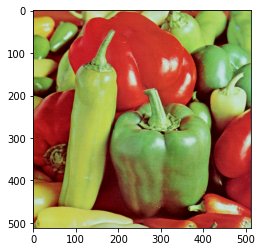

In [2]:
A = imread("/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-large.tiff")

print("The peppers-large.tiff image size is", len(A[:,:,0]))

plt.imshow(A)
plt.show()

The peppers-small.tiff image size is 128


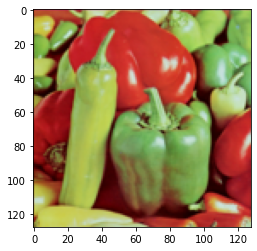

In [3]:
a = imread("/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-small.tiff")

print("The peppers-small.tiff image size is", len(a[:,:,0]))

plt.imshow(a)
plt.show()

In [4]:
def k_means(points, K):
    eps = 1e-3
    M, N = points.shape
    belongsto = np.zeros(M)

    # randomly select K points as centroids
    indices = np.arange(M)
    indices = np.random.choice(indices, size=K)
    
    # (K, N)
    centroids = points[indices].copy()

    max_iter = 300
    it = 0
    prev_dist, dist = None, None
    while it < max_iter and (prev_dist is None or abs(dist-prev_dist) > 1e-3):
        it += 1
        prev_dist = dist
        # assign points to centroids
        # compute distance
        # (M, K, N)
        diff = points[:, None]-centroids[None]
        dist = np.linalg.norm(diff, axis=2)
        belongsto = np.argmin(dist, axis=1)

        # update centroids
        for i in range(K):
            group = points[belongsto == i]
            centroids[i] = group.mean(axis=0)

        dist = np.linalg.norm(points-centroids[belongsto], axis=1).sum()
        print("Iter: {}, Dist: {}".format(it, dist))

    return centroids

Iter: 1, Dist: 380309.6042330543
Iter: 2, Dist: 306652.9348258658
Iter: 3, Dist: 290281.6531763783
Iter: 4, Dist: 286788.267349541
Iter: 5, Dist: 285257.5338286825
Iter: 6, Dist: 284084.9230887162
Iter: 7, Dist: 283080.57865046145
Iter: 8, Dist: 282097.3490388496
Iter: 9, Dist: 281129.8938994611
Iter: 10, Dist: 280178.2569370088
Iter: 11, Dist: 279216.1762709257
Iter: 12, Dist: 278370.57347827946
Iter: 13, Dist: 277754.7557177502
Iter: 14, Dist: 277338.9669049565
Iter: 15, Dist: 277044.1399358119
Iter: 16, Dist: 276879.4128697944
Iter: 17, Dist: 276744.16804132785
Iter: 18, Dist: 276606.25273933366
Iter: 19, Dist: 276513.04179705813
Iter: 20, Dist: 276411.6013240493
Iter: 21, Dist: 276354.21034693596
Iter: 22, Dist: 276334.5008390925
Iter: 23, Dist: 276330.931558637
Iter: 24, Dist: 276325.0181469722
Iter: 25, Dist: 276344.1327466739
Iter: 26, Dist: 276381.023254033
Iter: 27, Dist: 276367.8891100673
Iter: 28, Dist: 276364.6649964936
Iter: 29, Dist: 276362.4882706886
Iter: 30, Dist: 2763

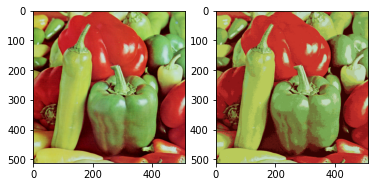

In [5]:
small_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-small.tiff"
large_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps3/data/peppers-large.tiff"

small = imread(small_path)
large = imread(large_path)

H, W, C = small.shape
K = 16
points = small.reshape(H*W, C)
centroids = k_means(points.astype(float), K)

diff = large[:, :, None]-centroids[None, None]
dist = np.linalg.norm(diff, axis=3)

# (H, W)
indices = np.argmin(dist, axis=2)
large_new = centroids[indices].astype(np.uint8)
plt.subplot(1, 2, 1)
plt.imshow(large)
plt.subplot(1, 2, 2)
plt.imshow(large_new)
plt.savefig("compressed.png")
